<a href="https://colab.research.google.com/github/ralsouza/study_case_eda_bike_taxi_nyc/blob/master/notebooks/02_eda_bike_taxis_nyc_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load saved data

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/04_study_case_eda_bike_taxi_nyc/data/taxis_bikes_nycity_changed_v1.csv')

# Check loaded data

In [3]:
data.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


the setting index is gone!!!

In [4]:
data.dtypes

Data          object
Distancia    float64
Tempo         object
dtype: object

The column Data returned as `object` data type.

# Load saved data again and doing some transformations
We will use the command to convert the date column to date type.


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/04_study_case_eda_bike_taxi_nyc/data/taxis_bikes_nycity_changed_v1.csv'
                  ,parse_dates=['Data'])

In [6]:
data.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [7]:
data.dtypes # Now yes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [0]:
# Changing the column names
data.columns = ['Date','Distance','Time']

In [9]:
# Check the data
data.head()

,Date,Distance,Time
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [0]:
# Setting the Date column as index again
data.set_index('Date', inplace=True)

In [11]:
# Check modified data
data.head(10)

,Distance,Time
Date,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
2015-08-08,3.40,NaN
2015-08-09,2.50,NaN
2015-08-10,3.36,0:28:37
2015-08-11,1.67,0:13:07


# Visualizing data

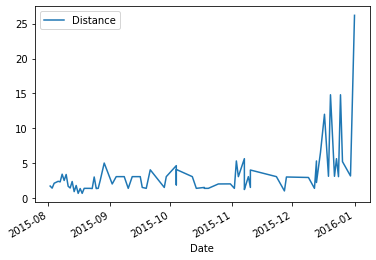

In [0]:
data.plot()

# Making some transformations

In [0]:
# Making a function to convert the Time to seconds
def calc_secs(time):
  if time is np.nan:
    return np.nan
  hrs, mins, seconds = str(time).split(':')
  seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
  return seconds

In [0]:
# Apply this function to a new column
data['seconds'] = data.Time.map(calc_secs)

In [14]:
data.head(10)

,Distance,Time,seconds
Date,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [0]:
# Now convert the Time column to minutes using the seconds column
data['minutes'] = data['seconds'].map(lambda x: x / 60)

In [16]:
# Checking the new column
data.head(10)

,Distance,Time,seconds,minutes
Date,,,,
2015-08-02,1.70,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0,28.616667
2015-08-11,1.67,0:13:07,787.0,13.116667


In [0]:
# Make a new measure minutes by distance
data['minBydis'] = data['minutes'] / data['Distance']

In [29]:
# Checking the new column
data.head(10)

,Distance,Time,seconds,minutes,minBydis
Date,,,,,
2015-08-02,1.70,NaN,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865
2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291


# Describing the dataset

In [30]:
data.describe()

,Distance,seconds,minutes,minBydis
count,81.000000,52.000000,52.000000,52.000000
mean,3.137531,1901.788462,31.696474,7.725297
std,3.634519,2560.424171,42.673736,0.954475
min,0.650000,376.000000,6.266667,6.000000
25%,1.370000,583.750000,9.729167,7.020479
50%,2.100000,1343.500000,22.391667,7.533333
75%,3.050000,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


In [31]:
# Filling NaN values with 0 and describing again
data.fillna(0).describe()

,Distance,seconds,minutes,minBydis
count,81.000000,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354,4.959450
std,3.634519,2240.756985,37.345950,3.803856
min,0.650000,0.000000,0.000000,0.000000
25%,1.370000,0.000000,0.000000,0.000000
50%,2.100000,573.000000,9.550000,6.962963
75%,3.050000,1426.000000,23.766667,7.792350
max,26.200000,15643.000000,260.716667,10.000000


# Ploting
This plot is to know whether there is any correlation between `Distance` and `Minutes`.

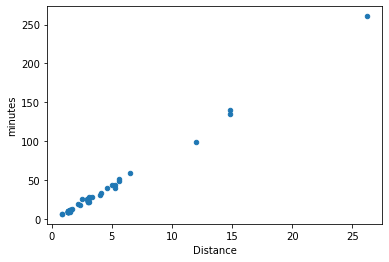

In [19]:
data.plot(x = 'Distance', y = 'minutes', kind = 'scatter')

In this case, there is a positive correlation. 

The greater the distance, more minutes are needed.

## Correlation Table

In [35]:
# Making a correlation table - Pearson 
data.corr()

,Distance,seconds,minutes,minBydis
Distance,1.000000,0.997203,0.997203,0.629387
seconds,0.997203,1.000000,1.000000,0.642184
minutes,0.997203,1.000000,1.000000,0.642184
minBydis,0.629387,0.642184,0.642184,1.000000


In [34]:
# Making a correlation table - Spearman
data.corr(method='spearman')

,Distance,seconds,minutes,minBydis
Distance,1.000000,0.964820,0.964820,0.755847
seconds,0.964820,1.000000,1.000000,0.870189
minutes,0.964820,1.000000,1.000000,0.870189
minBydis,0.755847,0.870189,0.870189,1.000000


In [33]:
# Making a correlation table - Kendall
data.corr(method='kendall')

,Distance,seconds,minutes,minBydis
Distance,1.000000,0.883050,0.883050,0.577922
seconds,0.883050,1.000000,1.000000,0.709263
minutes,0.883050,1.000000,1.000000,0.709263
minBydis,0.577922,0.709263,0.709263,1.000000


## Boxplot
Good for identifying outliers.


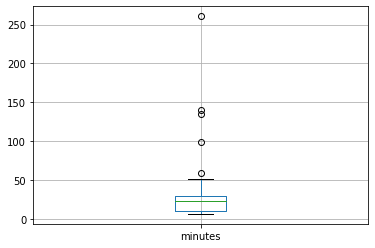

In [36]:
data.boxplot('minutes')

## Histogram
To see the distribuition of this variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6ad980668>]],
      dtype=object)

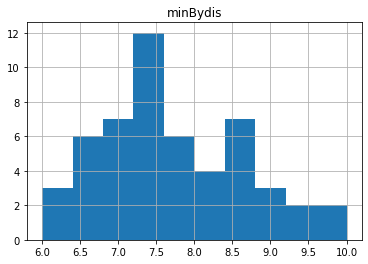

In [37]:
data.hist('minBydis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6ad81a4a8>]],
      dtype=object)

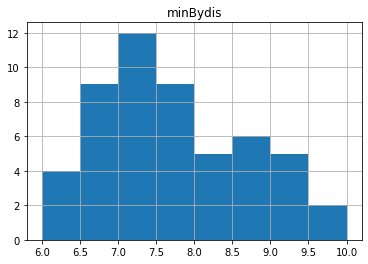

In [41]:
# Adjusting the bins
data.hist('minBydis',bins=8)

### Saving the plot image in disk


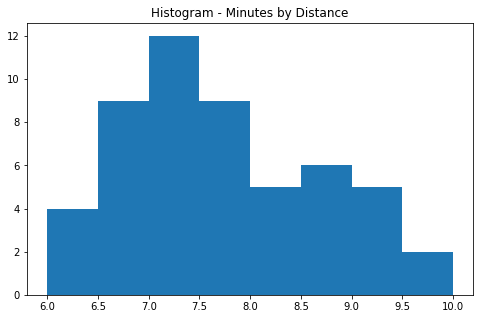

In [44]:
data.hist('minBydis',bins=8,figsize=(8,5))
plt.title('Histogram - Minutes by Distance')
plt.grid(False)
plt.savefig('/content/drive/My Drive/Colab Notebooks/04_study_case_eda_bike_taxi_nyc/data/hist_minBydis.png')

## Windowing

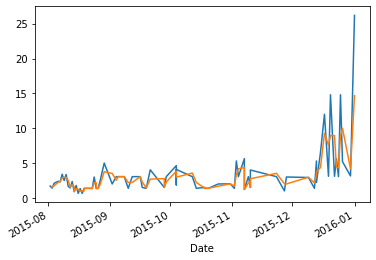

In [48]:
# Calculate the mean in a window of 2 hours
data['Distance'].plot() # Blue line
pd.Series(data['Distance']).rolling(window=2).mean().plot() # Orange line

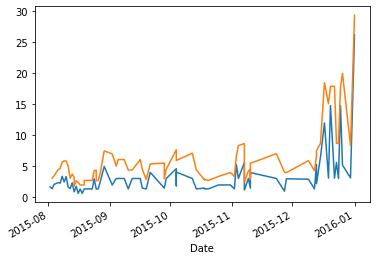

In [49]:
# Calculate the sum in a window of 2 hours
data['Distance'].plot() # Blue line
pd.Series(data['Distance']).rolling(window=2).sum().plot() # Orange line

## Plotting a Slice by Date (index)

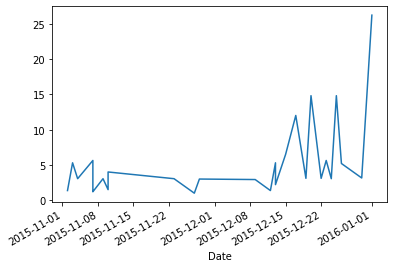

In [50]:
data['2015-11':'2016-1-1']['Distance'].plot()

# Backup Data File

In [0]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/04_study_case_eda_bike_taxi_nyc/data/taxis_bikes_nycity_changed_v2.csv')